## MNIST Dataset
- 손으로 쓴 0~9까지 숫자를 28*28 gray scale로 만든 것
- 6만개의 training data, 1만개의 test data

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from keras.utils.np_utils import to_categorical

In [78]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


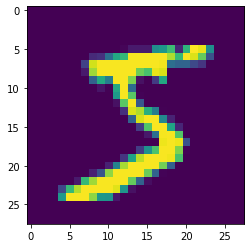

Label: 5


In [79]:
plt.imshow(X_train[0])
plt.show()
print('Label:', y_train[0])

In [80]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels:", dict(zip(unique, counts)))
# y_train에 0은 5923개, 1은 6742개, ... 출현

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


### Tensor
- Multi-Dimension Array와 비슷
- 0D Tensor : scalar, ex) 7
- 1D Tensor : vector, ex) [3, 8, 2.5, 7]
- 2D Tensor : matrix
- 3D Tensor : [matrix1, matrix2, ... , matrixn]
- 5D Tensor : [[matrix1, matrix2], ... , [matrixn-1, matrixn]]

- MNIST는 원래 3D Tensor($28\times28$)개가 60000개 들어 있음.
- 적용하려는 model의 input layer 종류에 따라 reshaping이 필요함. 
    - ANN : (9, )
    - CNN : (3, 3, 1)
    - RNN : (3, 3)

In [82]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
# (60000, 28, 28) ---> (60000, 784)가 됨.(28*28 = 784)
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [83]:
# One-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [121]:
model = Sequential()

model.add(Dense(50, input_shape=(784, )))
model.add(BatchNormalization())
model.add(Activation('sigmoid')) 
model.add(Dropout(0.2))  

model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('sigmoid')) 
model.add(Dropout(0.2))  

model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('sigmoid')) 
model.add(Dropout(0.2))  

model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 50)                39250     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
activation_7 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_8 (Activation)    (None, 50)              

In [122]:
adam = optimizers.Adam(lr = 0.001)

In [123]:
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [124]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 40, verbose = 1)

Epoch 1/40
165/165 [==============================] - 2s 7ms/step - loss: 1.6243 - accuracy: 0.4728 - val_loss: 1.2430 - val_accuracy: 0.8313
Epoch 2/40
165/165 [==============================] - 1s 6ms/step - loss: 1.1439 - accuracy: 0.6824 - val_loss: 0.6521 - val_accuracy: 0.8836
Epoch 3/40
165/165 [==============================] - 1s 6ms/step - loss: 0.9494 - accuracy: 0.7495 - val_loss: 0.5092 - val_accuracy: 0.8948
Epoch 4/40
165/165 [==============================] - 1s 6ms/step - loss: 0.8136 - accuracy: 0.7862 - val_loss: 0.4472 - val_accuracy: 0.8989
Epoch 5/40
165/165 [==============================] - 1s 6ms/step - loss: 0.7165 - accuracy: 0.8124 - val_loss: 0.3956 - val_accuracy: 0.9067
Epoch 6/40
165/165 [==============================] - 1s 6ms/step - loss: 0.6404 - accuracy: 0.8308 - val_loss: 0.3648 - val_accuracy: 0.9085
Epoch 7/40
165/165 [==============================] - 1s 6ms/step - loss: 0.5843 - accuracy: 0.8449 - val_loss: 0.3313 - val_accuracy: 0.9142
Epoch 

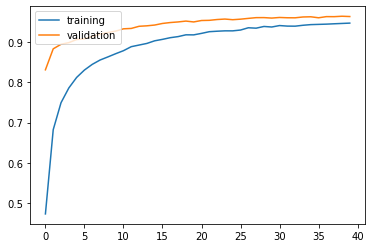

In [125]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [126]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.1124 - accuracy: 0.9668
Test accuracy:  0.9667999744415283


## Model 개선
1. 가중치 초기화(Weight Initialization)
    - defalut < LeCun < Xavier < He(he_normal)
2. 활성함수 (Activation Function)
    - Dense 뒤에 붙는 Activation 종류 바꾸어 보기
    - Sigmoid < ReLU
3. 최적화(Optimization) 기법
    - SGD < RMSprop < Adam
4. 배치 정규화(Batch Normalization)
5. Dropout
6. 모델 앙상블(Model Ensemble)